# Model Evaluation

In [1]:
# Load data manipulation package
import numpy as np
import pandas as pd

# Load data visualization package
import matplotlib.pyplot as plt
import seaborn as sns

## **Model Evaluation**
---

## **1. Model Estimation Fit**
---

#### **1.1 Likelihood Ratio Test**

Uses the likelihood function through the ratio of two maximizations of it :
1. The maximum over the possible parameter values that **assume the null hypothesis**,
2. The maximum over the larger set of possible parameter values, **assume the alternative hypothesis is true**.

**The hypotheses**:
  - Null Hypothesis: the logit model only contains intercept $\beta_{0}$.
  - Alternative Hypothesis: the logit model contains $\beta_{0}, \beta_{1}, \dots, \beta_{p}$.
    - $\text H_{0} : \beta = \beta_{0}$
    - $\text H_{1} : \beta = \beta_{0}, \beta_{1}, \dots, \beta_{p}$

**Test statistic**:
- The likelihood ratio (LLR):

$$
\begin{align*}
\text{LLR} &= -2 \log \left (\frac{\ell_{0}}{\ell_{1}}\right) \\
\text{LLR} &= -2 (L_{0}-L_{1})
\end{align*}
$$

<br>

- $L_{0}$ is the log likelihood function calculated at $\beta_{0}$.
- $L_{1}$ is the log likelihood function calculated at ML estimate $\beta_{0}, \beta_{1}, \dots, \beta_{p}$.

**Rejection region**:
- Reject null hypothesis ($\text H_{0}$) if $\text{LLR}>\chi^{2}_\alpha, _{\; \text{df}=1}$ or
- Reject null hypothesis ($\text H_{0}$) if $\text{P-value}<\alpha$.

#### **1.2 Deviance**

The deviance is the likelihood-ratio statistic for comparing model M to the saturated model.

  - Deviance:
$$
\text{Deviance} = -2(L_{M}-L_{S})
$$

<br>

- $L_{M}$ is the maximized log-likelihood value for a model $M$ of interest.
- $L_{S}$ is the maximized log-likelihood value for the most complex model possible or saturated model.

We can compare the models by comparing their deviances.
- $M_{0}$ with maximized log-likelihood $L_{0}$.
- $M_{1}$ with maximized log-likelihood $L_{1}$.
$$
\text{Deviance difference} = -2(L_{0}-L_{1})
$$

<br>

The difference is large when $M_{0}$ fits poorly compared with $M_{1}$.


#### **1.3 AIC (Akaike Information Criterion)**

- AIC penalizes a model for having many parameters.
- The optimal model is the one that tends to have the maximum log likelihood.
- That is the model that minimizes:

$$
\text{AIC} = -2(\text{log likelihood - number of parameters in model})
$$
- When comparing two models, the smaller value of AIC indicates the better model.


## **2. Predictive Performance**
---

- A cross-tabulation of the actual outcome with the predicted outcome.
- Remember the decision boundary $\hat{y}=1$ if $\pi(x) > 0.5$, otherwise $\hat{y}=0$.

<img src="../assets/classification_matrix.jpg" width=400>

- Correctly predicted outcomes :
 - True Positive (TP)
 - True Negative (TN)

- Incorrectly predicted outcomes :
 - False Positive (FP)
 - False Negative (FN)

**Accuracy**
- Measure of overall classification accuracy for both true positive and true negative.
$$
\text{Accuracy} = \frac{\text{TP+TN}}{\text{TP+FP+TN+FN}}
$$

**Sensitivity (True Positive Rate)**
- The percentage of actual positive outcomes that were correctly predicted.
$$
\text{Sensitivity} = \frac{\text{TP}}{\text{TP+FN}}
$$

**Spesificity (True Negative Rate)**
- The percentage of actual negative outcomes that were correctly predicted.
$$
\text{Specificity} = \frac{\text{TN}}{\text{TN+FP}}
$$

#### **2.2 ROC and AUC**

- In logistic regression, we use cut-off probability $\pi_{0}=0.5$ to classify the predicted probabilities.
- The prediction is $\hat{y}=1$ if $\pi(x) > \pi_{0}$, otherwise $\hat{y}=0$.
- However, if :
  - A **low proportion of observations have $y=1$**, the model fit may never have $\pi_{i}>0.5$, in which case one **never predicts $\hat{y}=1$**.
  - A **high proportion of observations have $y=1$**, the model fit may always have $\pi_{i}>0.5$, in which case one **always predicts $\hat{y}=1$**.
- Another possibility takes $\pi_{0}$ as the sample proportion of 1 outcomes.
- How do we know the chosen $\pi_{0}$ is the optimum cut-off probability?
---

- If we choose other values for cut-off probability, we will have different classification matrix and its measures.
- Receiver Operating Characteristic (ROC) is the plot of $\text{sensitivity}$ as a function of $(1 – \text{specificity})$ for the possible cut-off probabilities.
  - The $y$-axis : 	$\text{Sensitivity (True Positive Rate)}$
  - The $x$-axis : 	$1- \text{Specificity (False Positive Rate)}$
  
  $$
  \text{FPR} = \frac{\text{FP}}{\text{FP+TN}}
  $$

<img src="../assets/ROC.jpg" width = 500>

- The most preferable cut-off values are ones that move into the upper left of the chart, where the **$\text{sensitivity}$ is high** and the **$1 – \text{specificity}$ is low**.

- The AUC (area under the curve) is particularly useful in comparing between different models.

<img src="../assets/AUC.jpg" width = 500>

- Models with the higher AUC values are those extending towards the upper left portion of the graph and the desirable combinations of sensitivity and specificity.

# **Model Evaluation**
---

In [2]:
# Import dataset from csv file
data = pd.read_csv('../data/horseshoe_crab.csv')
data.drop(columns=['index'], inplace=True)

# Table check
data.head()

,Color,Spine,Width,Weight,Satellite
0,2,3,28.3,3.05,8
1,3,3,26.0,2.60,4
2,3,3,25.6,2.15,0
3,4,2,21.0,1.85,0
4,2,3,29.0,3.00,1


In [3]:
# Information check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Color      173 non-null    int64  
 1   Spine      173 non-null    int64  
 2   Width      173 non-null    float64
 3   Weight     173 non-null    float64
 4   Satellite  173 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 6.9 KB


- The dataset has **173 observations** from **5 variables**:
  - Color : multicategory (ordinal)
  - Spine : multicategory (nominal)
  - Width : continuous
  - Weight : continuous
  - Satellite : discrete (**response variable**)
- We gonna treat response variable Satellite as binary response (0 or 1).
- We need to code number of satellites into 1 for having satellites > 0, and 0 for having satellites = 0.

In [4]:
# Code the response variable Satellite
# Satellite=0 --> Satellite=0, otherwise Satellite=1
data['Satellite'] = data['Satellite'].apply(lambda x: 0 if x==0 else 1)

# Data check
data.head()

,Color,Spine,Width,Weight,Satellite
0,2,3,28.3,3.05,1
1,3,3,26.0,2.60,1
2,3,3,25.6,2.15,0
3,4,2,21.0,1.85,0
4,2,3,29.0,3.00,1


## **1. Model Estimation Fit**
---

### **1.1 Likelihood Ratio Test**
---

We want to assess the logit model $M_{1}$ :
$$
\text{logit(satellite)} = \beta_{0} + \beta_{1}(\text{width})
$$
compared to null model $M_{0}$ :
$$
\text{logit(satellite)} = \beta_{0}
$$
<br>
**Hypotheses** :
- Null Hypothesis: the logit model only contains intercept $\beta_{0}$.
- Alternative Hypothesis: the logit model contains $\beta_{0}$ and $\beta_{1}$.
    - $\text H_{0} : \beta = \beta_{0}$
    - $\text H_{1} : \beta = \beta_{0}, \beta_{1}$

**Test statistic**:
- The likelihood ratio (LLR):

 $$
\text{LLR} = -2 (L_{0}-L_{1})
$$

<br>

- $L_{0}$ is the maximum log likelihood of $M_{0}$.
- $L_{1}$ is the maximum log likelihood of $M_{1}$.


In [5]:
# Define the response satellite and predictor width
satellite = data['Satellite']
width = data[['Width']]

In [6]:
# Modeling with statsmodels.formula
import statsmodels.formula.api as smf

# Model fitting
formula = 'satellite ~ width'
model_width = smf.logit(formula = formula,
                        data = data)
result_width = model_width.fit()

# Print the result
print(result_width.summary())

Optimization terminated successfully.
         Current function value: 0.562002
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              satellite   No. Observations:                  173
Model:                          Logit   Df Residuals:                      171
Method:                           MLE   Df Model:                            1
Date:                Tue, 29 Oct 2024   Pseudo R-squ.:                  0.1387
Time:                        03:30:23   Log-Likelihood:                -97.226
converged:                       True   LL-Null:                       -112.88
Covariance Type:            nonrobust   LLR p-value:                 2.204e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.3508      2.629     -4.698      0.000     -17.503      -7.199
width          0.4972      0.

- Statsmodels package yields output for LLR Test.
- You can see the details [here](https://www.statsmodels.org/devel/generated/statsmodels.discrete.discrete_model.LogitResults.html)
- Some attributes of model result:
  - `llr` : the likelihood ratio statistic
  - `llr_pvalue` : the chi-squared probability (p-value)
  - `llnull` : log-likelihood of null model (intercept only)
  - `llf` : maximum log-likelihood of model of interest
- Example:
  - Run `result_model.llr` to get the LLR value of the model.


In [7]:
# Extract L0 as ll_null
ll_null = result_width.llnull

print(f"L0 = {ll_null:.2f}")

L0 = -112.88


In [8]:
# Extract L1 as ll_width
ll_width = result_width.llf

print(f"L1 = {ll_width:.3f}")

L1 = -97.226


Then, calculate $\text{LLR} = -2 (L_{0}-L_{1})$.

In [9]:
# Calculate LLR
llr_width_scratch = -2*(ll_null - ll_width)

# Print LLR from the summary output to cross check the scratch
llr_width_summary = result_width.llr

print(f"LLR from scratch = {llr_width_scratch:.3f}")
print(f"LLR from summary = {llr_width_summary:.3f}")

LLR from scratch = 31.306
LLR from summary = 31.306


In [10]:
# Extract P-value of LLR
p_val_llr = result_width.llr_pvalue

print(f"P-value of LLR = {p_val_llr:.4f}")

P-value of LLR = 0.0000


**Rejection decision** :
- Since $\text{P-value of LLR} < \alpha=0.5$, the null hypothesis $\beta=\beta_{0}$ **is rejected** at $\alpha=0.5$.

**Conclusion** :
> The predictor width has an effect on logit model.

Next, we want to assess another logit model $M_{2}$ :
$$
\text{logit(satellite)} = \beta_{0} + \beta_{1}(\text{width}) + \beta_{2}(\text{weight})
$$
compared to null model $M_{0}$ :
$$
\text{logit(satellite)} = \beta_{0}
$$

<br>

**Hypotheses** :
- Null Hypothesis: the logit model only contains intercept $\beta_{0}$.
- Alternative Hypothesis: the logit model contains $\beta_{0}$, $\beta_{1}$, and $\beta_{2}$.
  - $\text H_{0} : \beta = \beta_{0}$
  - $\text H_{1} : \beta = \beta_{0}, \beta_{1}, \beta_{2}$

**Test statistic**:
  - The likelihood ratio (LLR):

$$
\text{LLR} = -2 (L_{0}-L_{2})
$$

<br>

- $L_{0}$ is the maximum log likelihood of $M_{0}$.
- $L_{2}$ is the maximum log likelihood of $M_{2}$.


In [11]:
# Define the response variable
satellite = data['Satellite']

# Define the predictors
width = data[['Width']]
weight = data[['Weight']]

In [12]:
# Modeling with statsmodels.formula

# Model fitting
formula = 'satellite ~ width + weight'
model_width_weight = smf.logit(formula = formula,
                               data = data)
result_width_weight = model_width_weight.fit()

# Print the result
print(result_width_weight.summary())

Optimization terminated successfully.
         Current function value: 0.557489
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              satellite   No. Observations:                  173
Model:                          Logit   Df Residuals:                      170
Method:                           MLE   Df Model:                            2
Date:                Tue, 29 Oct 2024   Pseudo R-squ.:                  0.1456
Time:                        03:30:23   Log-Likelihood:                -96.446
converged:                       True   LL-Null:                       -112.88
Covariance Type:            nonrobust   LLR p-value:                 7.294e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.3540      3.528     -2.651      0.008     -16.269      -2.439
width          0.3068      0.

Then, calculate $\text{LLR} = -2 (L_{0}-L_{2})$.
Or you can extract the LLR and its P-value from statsmodels result.

In [13]:
# Extract the LLR
llr_width_weight = result_width_weight.llr

print(f"LLR M2 = {llr_width_weight:.3f}")

LLR M2 = 32.867


In [14]:
# Extract P-value of LLR
p_val_M2 = result_width_weight.llr_pvalue

print(f"P-value of LLR M2 = {p_val_M2:.4f}")

P-value of LLR M2 = 0.0000


**Rejection decision** :
- Since $\text{P-value of LLR} < \alpha=0.5$, the null hypothesis $\beta=\beta_{0}$ **is rejected** at $\alpha=0.5$.

**Conclusion** :
> Model 2 fits better than null model, at least one of predictors width and weight has an effect on logit model.

### **1.2 Deviance**
---

We want to compare the two models by comparing their deviances.
  - $M_{1}$ with maximized log-likelihood $L_{1}$ and logit model:
  $$
  \text{logit(satellite)} = \beta_{0} + \beta_{1}(\text{width})
  $$
  - $M_{2}$ with maximized log-likelihood $L_{2}$ and logit model:
  $$
  \text{logit(satellite)} = \beta_{0} + \beta_{1}(\text{width}) + \beta_{2}(\text{weight})
  $$

<br>

The deviance difference:
$$
\text{Deviance difference} = -2(L_{1}-L_{2})
$$
<br>

The difference is large when $M_{1}$ fits poorly compared with $M_{2}$.

In [15]:
# Extract L1 as ll_width
ll_width = result_width.llf

print(f"L1 = {ll_width:.3f}")

L1 = -97.226


In [16]:
# Extract L2 as ll_width_weight
ll_width_weight = result_width_weight.llf

print(f"L2 = {ll_width_weight:.3f}")

L2 = -96.446


Then, calculate $\text{Deviance difference} = -2(L_{1}-L_{2})$.

In [17]:
# Calculate deviance difference
deviance_diff = -2*(ll_width - ll_width_weight)

print(f"Deviance difference = {deviance_diff:.3f}")

Deviance difference = 1.561


In [18]:
# Extract tabulated chi-squared of deviance difference
import scipy.stats as stats

chi_sq = stats.chi2.ppf(q = 1-0.05,
                        df = 1)

print(f"Tabulated chi-sq = {chi_sq:.4f}")

Tabulated chi-sq = 3.8415


**Rejection decision** :
- Since $\text{deviance difference}<\chi^{2}_{\alpha=0.05}, _{\; \text{df}=1}$, we **fail to reject** the null hypothesis that the model only contains $\beta_{0}$ and $\beta_{1}$.

**Conclusion** :
> Adding predictor weight has no effect on logit model. This suggests that we don't need predictor weight in the logit model.

### **1.3 AIC**
---

- When comparing two models, the smaller value of AIC indicates the better model.
$$
\text{AIC} = -2(\text{log likelihood - number of parameters in model})
$$
- We want to compare two models before by comparing their AIC values.
  - $M_{1}$ with maximized log-likelihood $L_{1}$ and logit model:
  $$
  \text{logit(satellite)} = \beta_{0} + \beta_{1}(\text{width})
  $$
  - $M_{2}$ with maximized log-likelihood $L_{2}$ and logit model:
  $$
  \text{logit(satellite)} = \beta_{0} + \beta_{1}(\text{width}) + \beta_{2}(\text{weight})
  $$

---
Model 1 (Width only)

In [19]:
# Print the result
print(result_width.summary())

                           Logit Regression Results                           
Dep. Variable:              satellite   No. Observations:                  173
Model:                          Logit   Df Residuals:                      171
Method:                           MLE   Df Model:                            1
Date:                Tue, 29 Oct 2024   Pseudo R-squ.:                  0.1387
Time:                        03:30:23   Log-Likelihood:                -97.226
converged:                       True   LL-Null:                       -112.88
Covariance Type:            nonrobust   LLR p-value:                 2.204e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.3508      2.629     -4.698      0.000     -17.503      -7.199
width          0.4972      0.102      4.887      0.000       0.298       0.697


- Statsmodels package yields output for AIC.
- You can see the details [here](https://www.statsmodels.org/devel/generated/statsmodels.discrete.discrete_model.LogitResults.html)
- Example:
  - Run `result_model.aic` to get the AIC value of the model.

In [20]:
# Extract AIC of model 1
aic_width = result_width.aic

print(f"AIC model 1 = {aic_width:.2f}")

AIC model 1 = 198.45


Or calculate with the formula $\text{AIC} = -2(\text{log likelihood - number of parameters in model})$, where number of parameters in model 1 is 2 (parameter $\beta_{0}$ and $\beta_{1}$)

In [21]:
# Calculate with the formula
aic_width_scratch = -2*(ll_width - 2)
aic_width_scratch

198.45266392876505

---
Model 2 (adding Weight)

In [22]:
# Print the result
print(result_width_weight.summary())

                           Logit Regression Results                           
Dep. Variable:              satellite   No. Observations:                  173
Model:                          Logit   Df Residuals:                      170
Method:                           MLE   Df Model:                            2
Date:                Tue, 29 Oct 2024   Pseudo R-squ.:                  0.1456
Time:                        03:30:23   Log-Likelihood:                -96.446
converged:                       True   LL-Null:                       -112.88
Covariance Type:            nonrobust   LLR p-value:                 7.294e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.3540      3.528     -2.651      0.008     -16.269      -2.439
width          0.3068      0.182      1.686      0.092      -0.050       0.663
weight         0.8336      0.671      1.242      0.2

In [23]:
# Extract AIC of model 2
aic_width_weight = result_width_weight.aic

# Print and compare AIC model 1 & 2
print(f"AIC model 1 = {aic_width:.2f}")
print(f"AIC model 2 = {aic_width_weight:.2f}")

AIC model 1 = 198.45
AIC model 2 = 198.89


**Conclusion**
> Model 1 with single predictor width yields the smaller AIC, thus adding predictor weight has no effect on logit model.

This interpretation is consistent with the interpretation of comparing the two models by their deviance difference.

## **2. Predictive Performance**
---

### **2.1 Classification Matrix**
---

- In logistic regression, we use cut-off probability $\pi_{0}=0.5$ to classify the predicted probabilities.
- The prediction is $\hat{y}=1$ if $\pi(x) > \pi_{0}$, otherwise $\hat{y}=0$.
- Remember the predicted (success) probabilities from logistic/sigmoid function $\pi(x)$ :
$$
\pi(x) = \frac{e^{(\beta_{0}+\beta_{1}x)}}{1+e^{(\beta_{0}+\beta_{1}x)}}
$$

- From sklearn, you can use method `predict_proba(X)` to predict predicted probability $1-\pi(x)$ and $\pi(x)$.
- You can see the details [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba)
- Some methods:
  - `fit(X, y[, sample_weight])` : fit the model according to the given training data.
  - `predict_proba(X)` : returns the probability of the sample for each class in the model.
  - `predict(X)` : predict class labels for samples in X.


- With Statsmodels, you can use `predict([exog, transform])` to predict success probability $\pi(x)$.
- You can see the details [here](https://www.statsmodels.org/devel/generated/statsmodels.discrete.discrete_model.LogitResults.html)
- Some methods:
  - `predict([exog, transform])` : returns the probability of the sample for each class in the model.
  - `pred_table([threshold])` : returns the classification matrix of the predicted outcome given threshold parameter.

In this section, we use predict method from Statsmodels.
 - We already fit Model 1 in `result_width` with Statsmodels.

In [24]:
# Calculate success probability of X
pi_success_width = result_width.predict(exog = width)
pi_success_width[0:5]

0    0.848233
1    0.640418
2    0.593459
3    0.129096
4    0.887840
dtype: float64

Next, we build the classification matrix.
- The prediction is $\hat{y}=1$ if $\pi(x) > \pi_{0}$, otherwise $\hat{y}=0$.
<img src="../assets/classification_matrix.jpg" width=400>

- Correctly predicted outcomes :
 - True Positive (TP)
 - True Negative (TN)

- Incorrectly predicted outcomes :
 - False Positive (FP)
 - False Negative (FN)

In [25]:
# Build classification matrix from success probabilites
def classify(pi, y_actual, threshold=0.5):
    """
    Function to build the classification matrix.

    Parameters
    ----------
    pi : {array-like} of shape (n_sample, 1)
      The success probability of X
    y_actual : {array-like} of shape (n_sample, )
      The actual outcome or response variable
    threshold : float in range [0,1], default=0.5
      The cut-off probability

    Returns
    -------
    matrix : {array-like} of shape (2, 2)
      The classification matrix
    TN : int
      True Negatives
    FP : int
      False Postitives
    FN : int
      False Negatives
    TP : int
      True Positives
    """
    # Define initial list of predicted y
    y_pred = []

    # Classify predicted outcome y_pred=1 or y_pred=0
    for i in pi:
        if i > threshold:
            y_pred.append(1)
        else:
            y_pred.append(0)

    # Define final list of predicted y
    y_pred = np.array(y_pred)

    # Calculate the classification matrix
    # Define the components of classification matrix
    TP = 0
    FP = 0
    FN = 0
    TN = 0

    # Classify predicted y
    for i in range(len(y_actual)):
        if y_pred[i]==0 and y_actual[i]==0:
            TN += 1
        elif y_pred[i]==1 and y_actual[i]==0:
            FP += 1
        elif y_pred[i]==0 and y_actual[i]==1:
            FN += 1
        else:
            TP += 1

    # Arrange the classification matrix
    matrix = np.array([[TN,FP],[FN,TP]])

    return matrix, TN, FP, FN, TP

In [26]:
# Create classification matrix with threshold = 0.5
classification_result = classify(pi = pi_success_width,
                                 y_actual = satellite,
                                 threshold = 0.5)

matrix, TN, FP, FN, TP = classification_result

In [27]:
print("\nClassification Matrix\n", matrix)
print("\nTrue Negative =",TN)
print("False Positive =",FP)
print("False Negative =",FN)
print("True Positive =",TP)


Classification Matrix
 [[27 35]
 [16 95]]

True Negative = 27
False Positive = 35
False Negative = 16
True Positive = 95


- With **sklearn.metrics** you can use method [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).
- To make it simple in one step, we cross check the classification matrix above with method `pred_table` from Statsmodels.
  - We already fit Model 1 in `result_width` with Statsmodels.

In [28]:
# Cross check the classification matrix
# Use method pred_table from Statsmodels
matrix_width = result_width.pred_table(threshold = 0.5)

print(matrix_width)

[[27. 35.]
 [16. 95.]]


---
**Accuracy**
- Measure of overall classification accuracy for both true positive and true negative.
$$
\text{Accuracy} = \frac{\text{TP+TN}}{\text{TP+FP+TN+FN}}
$$

In [29]:
# Define the components of classification matrix
TP = matrix_width[1][1]
TN = matrix_width[0][0]
FP = matrix_width[0][1]
FN = matrix_width[1][0]

In [30]:
# Calculate accuracy
accuracy = (TP+TN)/(TP+FP+TN+FN)

print(f"Model 1 can correctly predict {accuracy*100:.2f}% of actual outcomes.")

Model 1 can correctly predict 70.52% of actual outcomes.


**Sensitivity (True Positive Rate)**
- The percentage of actual positive outcomes that were correctly predicted.
$$
\text{Sensitivity} = \frac{\text{TP}}{\text{TP+FN}}
$$

In [31]:
# Calculate sensitivity
sensitivity = (TP)/(TP+FN)

print(f"Model 1 can correctly predict {sensitivity*100:.2f}% of crabs with satellite.")

Model 1 can correctly predict 85.59% of crabs with satellite.


**Spesificity (True Negative Rate)**
- The percentage of actual negative outcomes that were correctly predicted.
$$
\text{Sensitivity} = \frac{\text{TN}}{\text{TN+FP}}
$$

In [32]:
# Calculate specificity
specificity = (TN)/(TN+FP)

print(f"Model 1 can correctly predict {specificity*100:.2f}% of crabs without satellite.")

Model 1 can correctly predict 43.55% of crabs without satellite.


Then summarize all in one function.

In [33]:
def predictive_performance(model_result, threshold=0.5):
    """
    Calculate model's predictive performance

    Parameters
    ----------
    model_result : result of fitted model
        Model result from Statsmodels Logit

    threshold : float in range[0,1], default = 0.5
        Cut-off probability to classify predicted outcome

    Returns
    -------
    accuracy : float
        The accuracy

    sensitivity : float
        The true positive rate

    specificity : float
        The true negative rate
    """
    # Create classificiation matrix from model result
    matrix = model_result.pred_table(threshold)

    # Define the components of classification matrix
    TP = matrix[1][1]
    TN = matrix[0][0]
    FP = matrix[0][1]
    FN = matrix[1][0]

    # Calculate metrics from classification matric
    accuracy = (TP+TN)/(TP+FP+TN+FN)
    sensitivity = (TP)/(TP+FN)
    specificity = (TN)/(TN+FP)

    return accuracy, sensitivity, specificity


In [34]:
# Cross check the predictive performance of Model 1 (X=width)
performa_width = predictive_performance(model_result = result_width,
                                        threshold = 0.5)
# Extract the metrics
accuracy, sensitivity, specificity = performa_width

In [35]:
# Print the metrics
print(f"Model 1 : logit = b0 + b1(Width)")
print(f"Accuracy    = {accuracy:.4f}")
print(f"Sensitivity = {sensitivity:.4f}")
print(f"Specificity = {specificity:.4f}")

Model 1 : logit = b0 + b1(Width)
Accuracy    = 0.7052
Sensitivity = 0.8559
Specificity = 0.4355


In summary, with cut-off probability (threshold) $\pi_{0}=0.5$, Model 1 $\text{logit(satellite)} = \beta_{0} + \beta_{1}(\text{width})$ results the predictive performance:

<center>

|Model|Accuracy|Sensitivity|Specificity|
|:--:|:--:|:--:|:--:|
|Model 1|0.7052|0.8559|0.4355|

</center>
<br>

Next, we summarize the predictive performance from Model 2 $\text{logit(satellite)} = \beta_{0} + \beta_{1}(\text{width}) + \beta_{2}(\text{weight})$

In [36]:
# Cross check the predictive performance of Model 2 (X = width, weight)
performa_width_weight = predictive_performance(model_result = result_width_weight,
                                               threshold = 0.5)

# Extract the metrics
accuracy, sensitivity, specificity = performa_width_weight

In [37]:
# Print the metrics
print(f"Model 1 : logit = b0 + b1(Width)")
print(f"Accuracy    = {accuracy:.4f}")
print(f"Sensitivity = {sensitivity:.4f}")
print(f"Specificity = {specificity:.4f}")

Model 1 : logit = b0 + b1(Width)
Accuracy    = 0.7110
Sensitivity = 0.8559
Specificity = 0.4516


Table below summarize the predictive performance from Model 1 and Model 2 with cut-off probability $\pi_{0}=0.5$
<center>

|Model|Accuracy|Sensitivity|Specificity|
|:--:|:--:|:--:|:--:|
|Model 1|0.7052|0.8559|0.4355|
|Model 2|0.7110|0.8559|0.4516|

</center>
<br>

**Conclusion**:

> Model 2 results the better accuracy and specificity, with the same value of sensitivity.

### **2.2 ROC and AUC**
---

- What if we choose other values for cut-off probability $\pi_{0}$?
- We can plot the ROC curve and its AUC.
- You can see the method from Sklearn [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html).

First, we need predicted probabilities from the logistic model.

In [38]:
# Calculate success probabilities from model 1
pi1 = result_width.predict(exog = width)

Import the method from Sklearn.

In [39]:
# Using method sklearn.metrics.roc_curve
from sklearn import metrics

# Calculate sensitivity (TPR) and 1-specificity (FPR) from each possible threshold
fpr1, tpr1, threshold = metrics.roc_curve(y_true = satellite,
                                          y_score = pi1)

# Calculate AUC score using method sklearn.metrics.roc_auc_score
auc1 = metrics.roc_auc_score(y_true = satellite,
                             y_score = pi1)
auc1 = round(auc1,4)

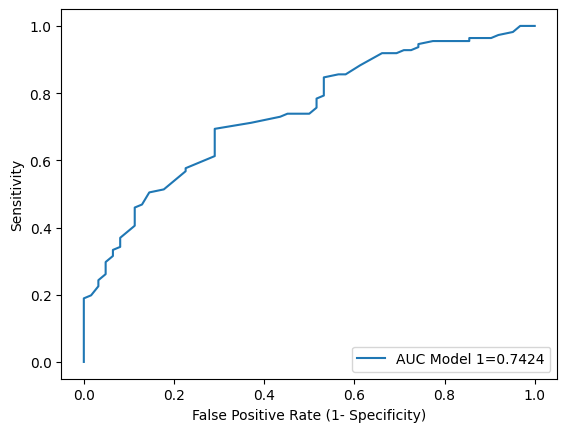

In [40]:
# Plot ROC and its AUC
plt.plot(fpr1, tpr1,
         label = "AUC Model 1="+str(auc1))

plt.ylabel("Sensitivity")
plt.xlabel("False Positive Rate (1- Specificity)")
plt.legend(loc = 4)
plt.show()

Next, we want to compare Model 1 and Model 2 by their ROC and AUC.

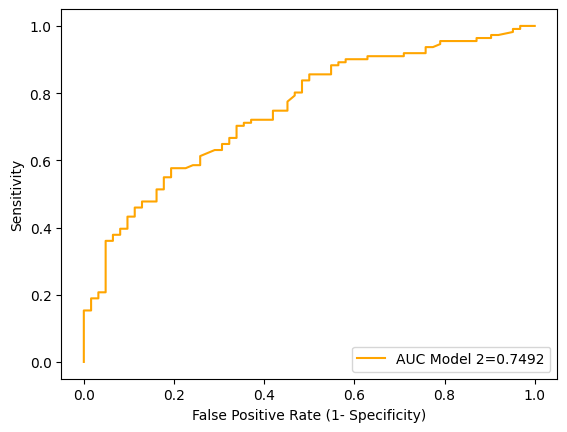

In [41]:
# ROC and AUC Model 2
# Define predictors of model 2, matrix X = [width, weight]
width_weight = data[['Width', 'Weight']]

# Calculate success probabilities from model 2
pi2 = result_width_weight.predict(exog = width_weight)

# Calculate sensitivity (TPR) and 1-specificity (FPR) from each possible threshold
# Using method sklearn.metrics.roc_curve
fpr2, tpr2, threshold = metrics.roc_curve(y_true = satellite,
                                          y_score = pi2)

# Calculate AUC score using method sklearn.metrics.roc_auc_score
auc2 = metrics.roc_auc_score(y_true = satellite,
                             y_score = pi2)
auc2 = round(auc2,4)

# Plot ROC and its AUC
plt.plot(fpr2, tpr2,
         label = "AUC Model 2="+str(auc2),
         color = 'orange')

plt.ylabel("Sensitivity")
plt.xlabel("False Positive Rate (1- Specificity)")
plt.legend(loc = 4)
plt.show()

Then compare ROC and AUC from two models.

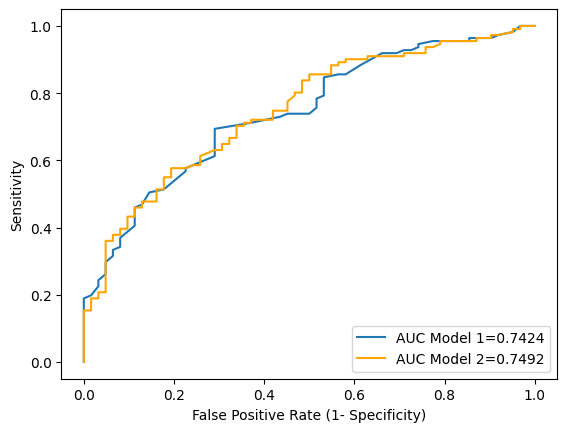

In [42]:
# Plot ROC AUC Model 1
plt.plot(fpr1, tpr1,
         label = "AUC Model 1="+str(auc1))

# Plot ROC AUC Model 2
plt.plot(fpr2, tpr2,
         label = "AUC Model 2="+str(auc2),
         color = 'orange')

plt.ylabel("Sensitivity")
plt.xlabel("False Positive Rate (1- Specificity)")
plt.legend(loc = 4)
plt.show()

**Conclusion** :
- We can see only a trivial difference between the two ROC curves, but model 2 yields the higher AUC.
- By its predictive performance, model 2 with both predictors Width and Weight perform better than model 1 with single predictor Width.
